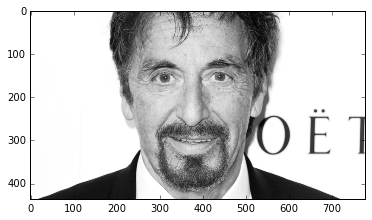

In [15]:
%matplotlib inline

from PIL import Image
from scipy import ndimage, misc
import io, cStringIO

import urllib2, urllib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# misc.imresize
# ndimage.filters.gaussian_filter

# fd = urllib2.urlopen("http://www.excelbridge.com/wp-content/uploads/2014/12/image.png")
# fd = urllib2.urlopen("http://www.factslides.com/imgs/s-Einstein.png")
fd = urllib2.urlopen("http://mediastorage.bauermedia.co.uk/67/23abc/3fdb3/42a41/b4b60/65cd1/5f61b/alpacino_778x436.png?1411648586")

# read the image file in a numpy array
img_l = plt.imread(fd)


# url='http://www.mendaily.com/wp-content/uploads/2012/10/Petronas-Towers-Kuala-Lumpur-Malaysia.jpg'
# img_l = Image.open(cStringIO.StringIO(urllib2.urlopen(url).read()))
# plt.imshow(img_l, cmap='Greys_r')
# plt.show()

# Creating a grayscale array from image 
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = ((0.2989 * r + 0.5870 * g + 0.1140 * b ) * 255)//1 # For 0-255
    gray = (0.2989 * r + 0.5870 * g + 0.1140 * b ) # For 0-1

    return gray
# end rgb2gray

def differentiate_x(layer):
    height = len(layer)
    width = len(layer[0])
    output_layer = np.zeros((height, width)) 
    
    for y in range(height):
        for x in range(width-1):
            output_layer[y][x] = layer[y][x+1] - layer[y][x] 
    return output_layer

def differentiate_y(layer):
    height = len(layer)
    width = len(layer[0])
    output_layer = np.zeros((height, width)) 
    
    for y in range(height-1):
        for x in range(width):
            output_layer[y][x] = layer[y+1][x] - layer[y][x] 
    return output_layer


img_l = rgb2gray(img_l)

plt.imshow(img_l, cmap='Greys_r')
plt.show()


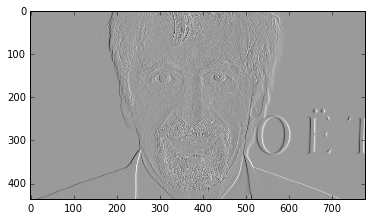

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0., -1.,  2., ...,  0.,  0.,  0.],
       [ 0., -1.,  2., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.]])

In [16]:
plt.imshow(differentiate_x(img_l), cmap='Greys_r')
plt.show()

differentiate_x(img_l)

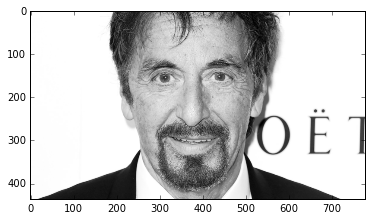

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [250, 250, 249, ..., 255, 255, 255],
       [250, 250, 249, ..., 255, 255, 255],
       [249, 250, 251, ..., 255, 255, 255]], dtype=uint8)

In [17]:
# resize the image 
img_l = (misc.imresize(img_l,1.0/1.0))
img_l = img_l/255.0

# resize the image 
img_m = misc.imresize(img_l,1.0/1.25)
img_m = img_m/255.0

# resize the image again
img_s = misc.imresize(img_m, 1.0/1.25)
img_s = img_s/255.0

plt.imshow(img_l, cmap='Greys_r')
plt.show()

img_l


In [18]:
k = 2**(1.0/5.0)
g_a = 1
g_b = 1*k
g_c = 1*k**2
g_d = 1*k**3
g_e = 1*k**4

# Create Gaussian blur layers
img_s_blur = [None] * 5
img_s_blur[0] = ndimage.filters.gaussian_filter(img_s,g_a)
img_s_blur[1] = ndimage.filters.gaussian_filter(img_s,g_b)
img_s_blur[2] = ndimage.filters.gaussian_filter(img_s,g_c)
img_s_blur[3] = ndimage.filters.gaussian_filter(img_s,g_d)
img_s_blur[4] = ndimage.filters.gaussian_filter(img_s,g_e)

img_m_blur = [None] * 5
img_m_blur[0] = ndimage.filters.gaussian_filter(img_m,g_a)
img_m_blur[1] = ndimage.filters.gaussian_filter(img_m,g_b)
img_m_blur[2] = ndimage.filters.gaussian_filter(img_m,g_c)
img_m_blur[3] = ndimage.filters.gaussian_filter(img_m,g_d)
img_m_blur[4] = ndimage.filters.gaussian_filter(img_m,g_e)

img_l_blur = [None] * 5
img_l_blur[0] = ndimage.filters.gaussian_filter(img_l,1)
img_l_blur[1] = ndimage.filters.gaussian_filter(img_l,2)
img_l_blur[2] = ndimage.filters.gaussian_filter(img_l,3)
img_l_blur[3] = ndimage.filters.gaussian_filter(img_l,4)
img_l_blur[4] = ndimage.filters.gaussian_filter(img_l,5)

# Create DoG layers
img_s_dog = [None] * 4
img_s_dog[0] = img_s_blur[1] - img_s_blur[0]
img_s_dog[1] = img_s_blur[2] - img_s_blur[1]
img_s_dog[2] = img_s_blur[3] - img_s_blur[2]
img_s_dog[3] = img_s_blur[4] - img_s_blur[3]

img_m_dog = [None] * 4
img_m_dog[0] = img_m_blur[1] - img_m_blur[0]
img_m_dog[1] = img_m_blur[2] - img_m_blur[1]
img_m_dog[2] = img_m_blur[3] - img_m_blur[2]
img_m_dog[3] = img_m_blur[4] - img_m_blur[3]

img_l_dog = [None] * 4
img_l_dog[0] = img_l_blur[1] - img_l_blur[0]
img_l_dog[1] = img_l_blur[2] - img_l_blur[1]
img_l_dog[2] = img_l_blur[3] - img_l_blur[2]
img_l_dog[3] = img_l_blur[4] - img_l_blur[3]

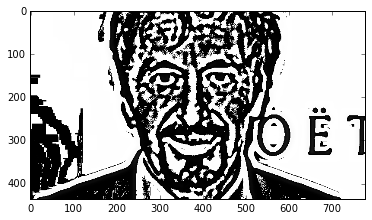

In [19]:

plt.imshow(img_l_dog[3], cmap='Greys_r')
plt.show()

In [6]:
img_l_dog[3]

array([[ -2.56429886e-04,  -2.50734925e-04,  -2.39273468e-04, ...,
         -5.55111512e-16,  -5.55111512e-16,  -5.55111512e-16],
       [ -2.49156222e-04,  -2.41839536e-04,  -2.27404439e-04, ...,
         -5.55111512e-16,  -5.55111512e-16,  -5.55111512e-16],
       [ -2.34891082e-04,  -2.24514725e-04,  -2.04480199e-04, ...,
         -5.55111512e-16,  -5.55111512e-16,  -5.55111512e-16],
       ..., 
       [  2.99739663e-04,   2.26692538e-04,   8.50820408e-05, ...,
         -5.55111512e-16,  -5.55111512e-16,  -5.55111512e-16],
       [  2.88698358e-04,   2.12893543e-04,   6.58468612e-05, ...,
         -5.55111512e-16,  -5.55111512e-16,  -5.55111512e-16],
       [  2.83667637e-04,   2.06409206e-04,   5.65004417e-05, ...,
         -5.55111512e-16,  -5.55111512e-16,  -5.55111512e-16]])

In [13]:
from numpy.linalg import inv

def return_extrema(dog_set, img):
    extrema_x = []
    extrema_y = []
    print "xrange: ", len(dog_set[0])
    print "yrange: ", len(dog_set[0][0])

    # ITERATE OVER THE ALL INTERNAL BLUR LEVELS OF IMAGE
    for dog_level in range(1,3):
        # GENERATE THE DIFFERENTIATED IMAGES
        dx = differentiate_x(dog_set[dog_level])
        dy = differentiate_y(dog_set[dog_level])
        dxx = differentiate_x(dx)
        dyy = differentiate_y(dy)
        dxy = differentiate_y(dx)
        
        # ITERATE OVER EACH BLUR LEVEL
        for y in range(1, len((dog_set[0])) - 1):
            for x in range(1, (len(dog_set[0][0])) - 1):
                
                curr_x = x
                curr_y = y
                
                # x,y coordinates of center of the 3x3 square
                max_v = -100000
                min_v =  100000                                                                                                                                                            
                for lvl in range(-1,2): # compare level below, current level and level above
                    for sq_y in range(-1,2): 
                        for sq_x in range(-1,2):                        
                            if not(lvl == 0 and sq_y == 0 and sq_x == 0):
                                # if any of the other points are equal, then it is not an extrema
                                if dog_set[dog_level + lvl][y+sq_y][x+sq_x] < min_v: 
                                    min_v = dog_set[dog_level + lvl][y+sq_y][x+sq_x]
                                if dog_set[dog_level + lvl][y+sq_y][x+sq_x] > max_v:
                                    max_v = dog_set[dog_level + lvl][y+sq_y][x+sq_x]
                
                # POTENTIAL EXTREMUM
                if dog_set[dog_level][curr_y][curr_x] > max_v or dog_set[dog_level][curr_y][curr_x] < min_v:
                    # MOVE EXTREMUM TO ACTUAL LOCATION
                    while True:
                        print "while"
                        a = -1.0 * inv(np.matrix(((dxx[curr_y][curr_x],dxy[curr_y][curr_x],),(dxy[curr_y][curr_x],dyy[curr_y][curr_x],))))
                        b = np.matrix(((dx[curr_y][curr_x],),(dy[curr_y][curr_x],)))
                        x_hat =  np.dot( a , b )
                        
                        print "x_hat"
                        print x_hat
                        
                        if( abs(float(x_hat[0])) < 0.55 and abs(float(x_hat[1])) < 0.55 ):
                            break
                        elif( float(x_hat[0]) > 0.55 ):
                            curr_x += 1
                        elif( float(x_hat[0]) < -0.55 ): 
                            curr_x -= 1
                        elif( float(x_hat[1]) > 0.55 ): 
                            curr_y += 1
                        elif( float(x_hat[1]) < -0.55 ): 
                            curr_y -= 1
                    # end while loop       
                    
                    # VERIFY IF LOW CONTRAST
                    lcv = dog_set[dog_level][curr_y][curr_x] + 0.5*np.dot( np.matrix(( dx[curr_y][curr_x], dy[curr_y][curr_x] )) , x_hat )
                    print "low contrast value: ", lcv
                    if( lcv > 0.03 ):
                        # VERIFY IF EDGE EXTREMUM
                        extrema_x.append(x)
                        extrema_y.append(y)
                        
                        return (extrema_x, extrema_y)

In [7]:
a = np.matrix(((2,),(1,)))
b = np.matrix(((13,),(9,)))

c = np.dot(a.transpose() ,b)
c


matrix([[35]])

In [14]:
(ex_x_s, ex_y_s) = return_extrema(img_s_dog, img_s)

plt.imshow(img_s, cmap='Greys_r')
plt.scatter(ex_x_s,ex_y_s, marker='+', color="red", s=40)
plt.show()

print ex_x_s
print ex_y_s

xrange:  278
yrange:  497
while
x_hat
[[-11.04753471]
 [ -7.73435039]]
while
x_hat
[[ 0.52031633]
 [-0.51130972]]
low contrast value:  [[ 0.0034016]]
while
x_hat
[[ 1.53786685]
 [ 2.93654493]]
while
x_hat
[[ 2.70130121]
 [-0.30351284]]
while
x_hat
[[ 2.14273637]
 [-0.68162913]]
while
x_hat
[[ 1.50345869]
 [-0.24473938]]
while
x_hat
[[ 0.86360792]
 [-0.55118977]]
while
x_hat
[[-1.06198504]
 [-3.7829655 ]]
while
x_hat
[[ 0.86360792]
 [-0.55118977]]
while
x_hat
[[-1.06198504]
 [-3.7829655 ]]
while
x_hat
[[ 0.86360792]
 [-0.55118977]]
while
x_hat
[[-1.06198504]
 [-3.7829655 ]]
while
x_hat
[[ 0.86360792]
 [-0.55118977]]
while
x_hat
[[-1.06198504]
 [-3.7829655 ]]
while
x_hat
[[ 0.86360792]
 [-0.55118977]]
while
x_hat
[[-1.06198504]
 [-3.7829655 ]]
while
x_hat
[[ 0.86360792]
 [-0.55118977]]
while
x_hat
[[-1.06198504]
 [-3.7829655 ]]
while
x_hat
[[ 0.86360792]
 [-0.55118977]]
while
x_hat
[[-1.06198504]
 [-3.7829655 ]]
while
x_hat
[[ 0.86360792]
 [-0.55118977]]
while
x_hat
[[-1.06198504]
 [-3.7

KeyboardInterrupt: 

xrange:  348
yrange:  622


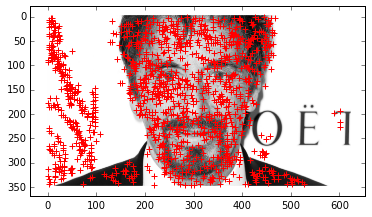

[287, 426, 444, 460, 468, 7, 10, 217, 275, 304, 298, 339, 363, 312, 3, 10, 350, 393, 132, 183, 304, 399, 224, 237, 339, 12, 15, 457, 297, 161, 165, 210, 422, 169, 448, 229, 323, 203, 253, 420, 23, 294, 355, 361, 396, 283, 321, 6, 173, 292, 295, 3, 13, 16, 339, 21, 207, 373, 266, 324, 386, 405, 14, 230, 316, 278, 427, 168, 258, 439, 16, 320, 462, 150, 185, 200, 434, 442, 135, 311, 466, 11, 316, 322, 385, 3, 23, 388, 461, 11, 357, 384, 425, 3, 331, 381, 391, 14, 23, 157, 11, 20, 218, 273, 399, 430, 201, 336, 418, 423, 25, 243, 327, 395, 444, 19, 348, 200, 226, 293, 309, 413, 416, 9, 193, 240, 441, 23, 396, 438, 128, 133, 172, 183, 349, 366, 228, 307, 389, 214, 287, 415, 186, 274, 335, 234, 271, 355, 388, 417, 260, 182, 146, 3, 7, 167, 378, 457, 11, 166, 293, 413, 455, 3, 9, 409, 233, 248, 275, 186, 189, 364, 389, 3, 6, 428, 248, 331, 431, 446, 282, 203, 240, 11, 14, 355, 29, 342, 420, 260, 305, 399, 10, 18, 187, 203, 215, 297, 453, 7, 464, 13, 36, 366, 400, 405, 11, 25, 309, 369, 16, 318

In [132]:
(ex_x_m, ex_y_m) = return_extrema(img_m_dog, img_m)

plt.imshow(img_m, cmap='Greys_r')
plt.scatter(ex_x_m,ex_y_m, marker='+', color="red", s=40)
plt.show()

print ex_x_m
print ex_y_m

xrange:  436
yrange:  778


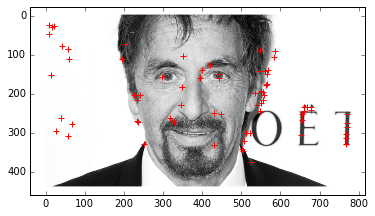

[9, 21, 16, 8, 41, 547, 585, 584, 60, 400, 567, 560, 545, 442, 566, 13, 296, 395, 564, 348, 549, 556, 242, 557, 555, 550, 346, 661, 669, 678, 678, 659, 547, 449, 232, 236, 68, 25, 523, 57, 508, 252, 501, 524, 202, 56, 351, 195, 420, 444, 442, 565, 536, 226, 232, 541, 430, 654, 769, 318, 40, 654, 329, 769, 769, 512, 768, 653, 768, 767, 431, 503]
[22, 25, 29, 46, 77, 87, 91, 105, 111, 139, 139, 140, 141, 148, 148, 152, 157, 160, 177, 183, 193, 194, 201, 202, 215, 223, 227, 232, 232, 232, 241, 242, 244, 250, 268, 270, 276, 293, 299, 308, 321, 328, 340, 374, 71, 85, 103, 109, 125, 149, 158, 174, 196, 202, 214, 229, 249, 250, 250, 260, 261, 267, 270, 275, 285, 299, 302, 305, 312, 327, 329, 345]


In [133]:
(ex_x_l, ex_y_l) = return_extrema(img_l_dog, img_l)

plt.imshow(img_l, cmap='Greys_r')
plt.scatter(ex_x_l,ex_y_l, marker='+', color="red", s=40)
plt.show()

print ex_x_l
print ex_y_l